#### Deep Learning

+ A model processes data and learns to predict labels 
+ Use multiple models such as a feedforward NN
+ Introduce Transformer model
+ Loss is plotted for model classification on dummy data


#### Imports

In [3]:
import numpy as np   
import os              
import sys

import tensorflow as tf
import matplotlib.pyplot as plt

from functions import display_helper
from functions import dummy_data
from models.Transformer import TransformerModel
from models.DNN import NN, DNN

#### Initialise and Compile Models

+ Fully connected feedforward Neural Network (NN) 
+ Transformer model (https://github.com/SuperBruceJia/EEG-DL/blob/master/Models/main-Transformer.py)


In [4]:
simpleModel = NN()
transformerModel = TransformerModel()

simpleModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy())
transformerModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Recall()])

2022-07-22 14:42:16.065348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 14:42:16.273688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-07-22 14:42:16.273711: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-07-22 14:42:16.274190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

#### Training loop:

In [5]:
model = transformerModel      # simpleModel , transformerModel

X, Y = dummy_data.create_labeled_dataset(1000, ["planck", "constant"])

history = model.fit(np.array(X), Y, validation_split=0.33, 
                epochs=20, batch_size=50, verbose=0)

#### Plot Loss 
(Test loss is lower since it has no dropout)

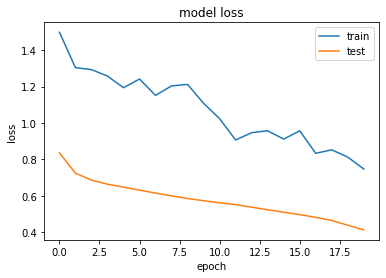

In [6]:
display_helper.show_plot(range(len(history.history['loss'])), [history.history['loss'], history.history['val_loss']],
                         "model loss", "epoch", "loss", ['train', 'test'])

TODO:
+ Show the confidence of a prediction (with softmax probability between 0 and 1) 
+ Compare multiple models on dummy data (DNN, CNN, RNN, Transformer(Encoder))